In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime as date

In [3]:
start = '2001-01-01'
last = date.datetime.today() - date.timedelta(days=1)
year = last.strftime("%Y")
month = last.strftime("%m")
day = last.strftime("%d")
end = year + "-" + month + "-" + day

df = data.DataReader('EICHERMOT.NS', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-01,2.800,2.735,2.740,2.80,19290.0,1.756827
2001-01-02,2.950,2.755,2.755,2.87,84930.0,1.800748
2001-01-03,3.000,2.840,2.840,2.94,78200.0,1.844669
2001-01-04,2.995,2.900,2.950,2.90,51000.0,1.819571
2001-01-05,2.950,2.810,2.895,2.95,74930.0,1.850943


In [4]:
df = df.reset_index()
df = df.drop(['Date', 'Adj Close'], axis = 1)

df.head()

,High,Low,Open,Close,Volume
0,2.800,2.735,2.740,2.80,19290.0
1,2.950,2.755,2.755,2.87,84930.0
2,3.000,2.840,2.840,2.94,78200.0
3,2.995,2.900,2.950,2.90,51000.0
4,2.950,2.810,2.895,2.95,74930.0


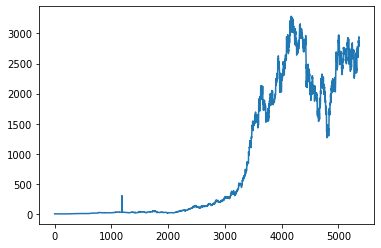

In [5]:
plt.plot(df.Close)

In [6]:
ma_hundred = df.Close.rolling(100).mean()
ma_twoh = df.Close.rolling(200).mean()

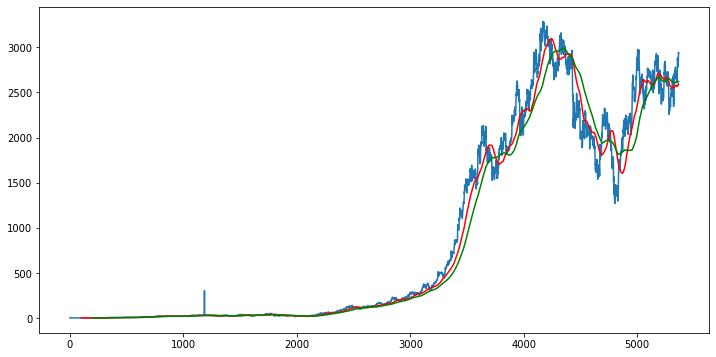

In [7]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma_hundred, 'r')
plt.plot(ma_twoh, 'g')

In [8]:
train_set = pd.DataFrame(df['Close'][0:int(len(df) * 0.80)])
test_set = pd.DataFrame(df['Close'][int(len(df) * 0.80): int (len(df))])

print(train_set.shape)
print(test_set.shape)

(4292, 1)
(1074, 1)


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [10]:
train_list = scaler.fit_transform(train_set)
train_list

array([[3.13601300e-04],
       [3.34913990e-04],
       [3.56226753e-04],
       ...,
       [8.34850802e-01],
       [8.44124938e-01],
       [8.38218228e-01]])

In [11]:
x_train = []
y_train = []

for i in range(100, train_list.shape[0]):
    x_train.append(train_list[i-100: i])
    y_train.append(train_list[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [13]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.3))

model.add(LSTM(units = 100, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.4))

model.add(LSTM(units = 150, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_1 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 100)          72400     
                                                                 
 dropout_2 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_3 (LSTM)               (None, 150)               1

In [15]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
131/131 [==============================] - 34s 237ms/step - loss: 0.0136
Epoch 2/50
131/131 [==============================] - 40s 306ms/step - loss: 0.0028
Epoch 3/50
131/131 [==============================] - 39s 299ms/step - loss: 0.0026
Epoch 4/50
131/131 [==============================] - 39s 298ms/step - loss: 0.0026
Epoch 5/50
131/131 [==============================] - 40s 302ms/step - loss: 0.0024
Epoch 6/50
131/131 [==============================] - 39s 300ms/step - loss: 0.0023
Epoch 7/50
131/131 [==============================] - 39s 300ms/step - loss: 0.0023
Epoch 8/50
131/131 [==============================] - 40s 305ms/step - loss: 0.0023
Epoch 9/50
131/131 [==============================] - 40s 309ms/step - loss: 0.0021
Epoch 10/50
131/131 [==============================] - 37s 279ms/step - loss: 0.0024
Epoch 11/50
131/131 [==============================] - 35s 269ms/step - loss: 0.0020
Epoch 12/50
131/131 [==============================] - 36s 271ms/step - lo

In [26]:
model.save('stocks_model.h5')

In [31]:
temp = train_set.tail(100)

test_final = temp.append(test_set, ignore_index = True)

test_final.head()

C:\Users\anrag\AppData\Local\Temp\ipykernel_8420\2699504873.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_final = temp.append(test_set, ignore_index = True)


,Close
0,52.242500
1,50.687500
2,50.435001
3,51.625000
4,52.587502


In [38]:
input2 = scaler.fit_transform(test_final)
input2.shape

(730, 1)

In [39]:
x_test = []
y_test = []

for i in range(100, input2.shape[0]):
    x_test.append(input2[i-100: i])
    y_test.append(input2[i, 0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(630, 100, 1)
(630,)


In [41]:
y_predict = model.predict(x_test)

y_predict.shape

20/20 [==============================] - 2s 80ms/step


(630, 1)

In [50]:
scale_factor = 1/(scaler.scale_[0])
scale_factor

131.57499313354492

In [52]:
y_predict *= scale_factor
y_test *= scale_factor

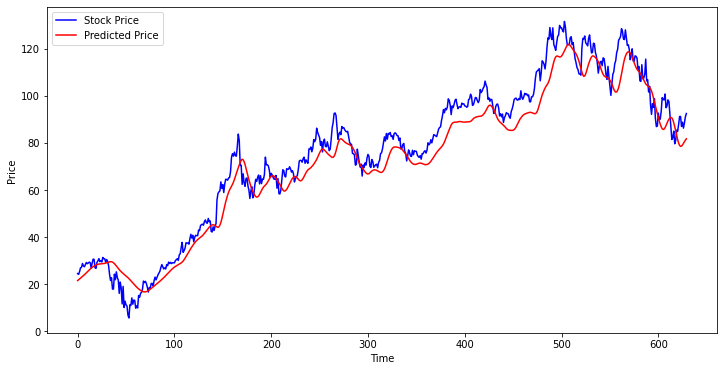

In [54]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Stock Price')
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()